<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week02/01_BasisFunction_FinancialMarket_Regression_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# Load the dataset from CSV
data = pd.read_csv('/content/FinancialMarket.csv')

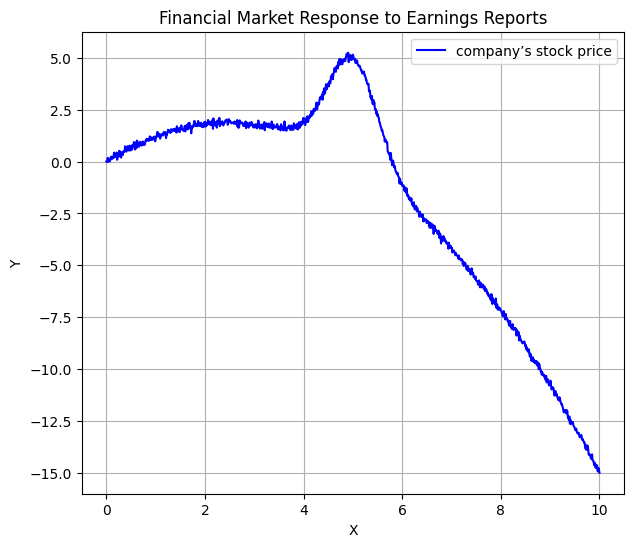

In [53]:
# Extract the x and combined data columns
x = data['x'].values # Mengambil kolom 'x' dari dataframe 'data' sebagai array numpy (dari kolom fitur independen)
combined_data = data['combined_data'].values # Mengambil kolom 'combined_data' sebagai array numpy (dari kolom target/label yang ingin diprediksi)


# Step 3: Visualize the dataset
plt.figure(figsize=(7, 6)) # Membuat figure dengan ukuran 7x6 inci untuk menampilkan visualisasi


# Plot the combined data
plt.plot(x, combined_data, label='company’s stock price', color='blue')
# Membuat plot garis untuk data yang sudah diekstrak. x sebagai variabel independen dan combined_data sebagai variabel dependen.

# Add labels and title
plt.title('Financial Market Response to Earnings Reports')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Ensure there's a label to show in the legend

# Display the plot
plt.show()

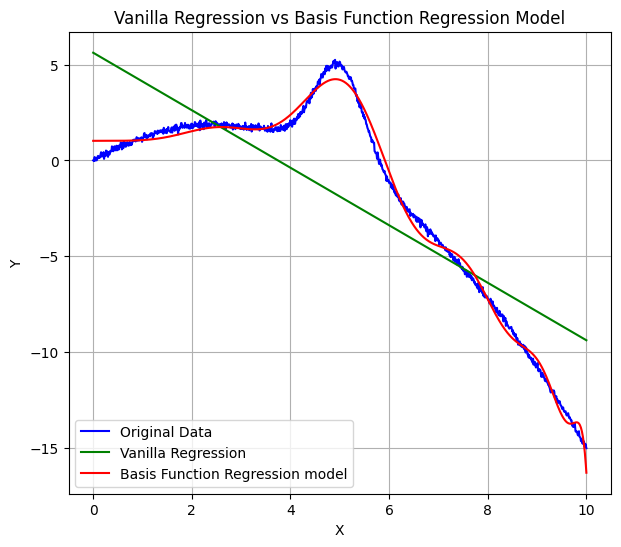

In [54]:
# Extract the x and combined data columns
x = data['x'].values.reshape(-1, 1)  # Memastikan x berbentuk 2D array
combined_data = data['combined_data'].values

# Step 1: Plot Data Asli (company’s stock price)
plt.figure(figsize=(7, 6))

# Plot the combined data
plt.plot(x, combined_data, label='Original Data', color='blue')

# Step 2: Linear Regression (Vanilla)
linear_model = LinearRegression()
linear_model.fit(x, combined_data)  # Latih model regresi linear
linear_y_pred = linear_model.predict(x)  # Prediksi nilai y dengan model linear

# Evaluasi model Vanilla Linear Regression
mse_linear = mean_squared_error(combined_data, linear_y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(combined_data, linear_y_pred)

# Plotkan garis regresi linear
plt.plot(x, linear_y_pred, label='Vanilla Regression', color='green')

# Step 3: Polynomial Regression (Basis Fungsi) dengan Degree 17
degree = 17 # Derajat polinomial yang kita pilih
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)  # Ubah x menjadi fitur polinomial

poly_model = LinearRegression()
poly_model.fit(x_poly, combined_data)  # Latih model regresi polinomial
poly_y_pred = poly_model.predict(x_poly)  # Prediksi nilai y dengan model polinomial

# Evaluasi model Polynomial Regression
mse_poly = mean_squared_error(combined_data, poly_y_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(combined_data, poly_y_pred)

# Plotkan garis regresi polinomial
plt.plot(x, poly_y_pred, label=f'Basis Function Regression model', color='red')

# Tambahkan label, judul, dan legend
plt.title('Vanilla Regression vs Basis Function Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Pastikan semua label ditampilkan di legend

# Tampilkan plot
plt.show()

In [55]:
# Print evaluasi hasil ke konsol
print("Vanilla Regression:")
print(f"MSE: {mse_linear}, RMSE: {rmse_linear}, R^2: {r2_linear}")

print("\nBasis Function Regression Model:")
print(f"MSE: {mse_poly}, RMSE: {rmse_poly}, R^2: {r2_poly}")

Vanilla Regression:
MSE: 9.887619132900994, RMSE: 3.144458480072681, R^2: 0.6547481050711528

Basis Function Regression Model:
MSE: 0.1689593182590861, RMSE: 0.41104661324366376, R^2: 0.9941003467052315
